In [105]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

In [106]:
duracion_df = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/peak_detection_info.csv')
data_df = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/src/data/data_for_clustering_1.csv')

In [107]:
duracion_df['global'] = pd.to_numeric(duracion_df['global'], errors='coerce')
data_df['global_peak'] = pd.to_numeric(data_df['global_peak'], errors='coerce')

duracion_df = duracion_df.dropna(subset=['global'])
data_df     = data_df.dropna(subset=['global_peak'])

duracion_df['global_rounded'] = duracion_df['global'].round(4)
data_df['global_peak_rounded'] = data_df['global_peak'].round(4)

merged_df = pd.merge(
    duracion_df,
    data_df,
    left_on='global_rounded',
    right_on='global_peak_rounded',
    how='inner'
)
merged_df = merged_df.drop(columns=[
    'local',
    'local_fecha',
    'global_peak_rounded',
    'global_rounded',
    'fecha',
    'duracion_local'
])
duration_event_and_peak = merged_df.copy()

In [108]:
ruta = "/home/nivelrios/documentos/Mburicao Project/src/data"
os.makedirs(ruta, exist_ok=True)
archivo = os.path.join(ruta, "duration_event_and_peak.csv")
duration_event_and_peak.to_csv(archivo, index=False)

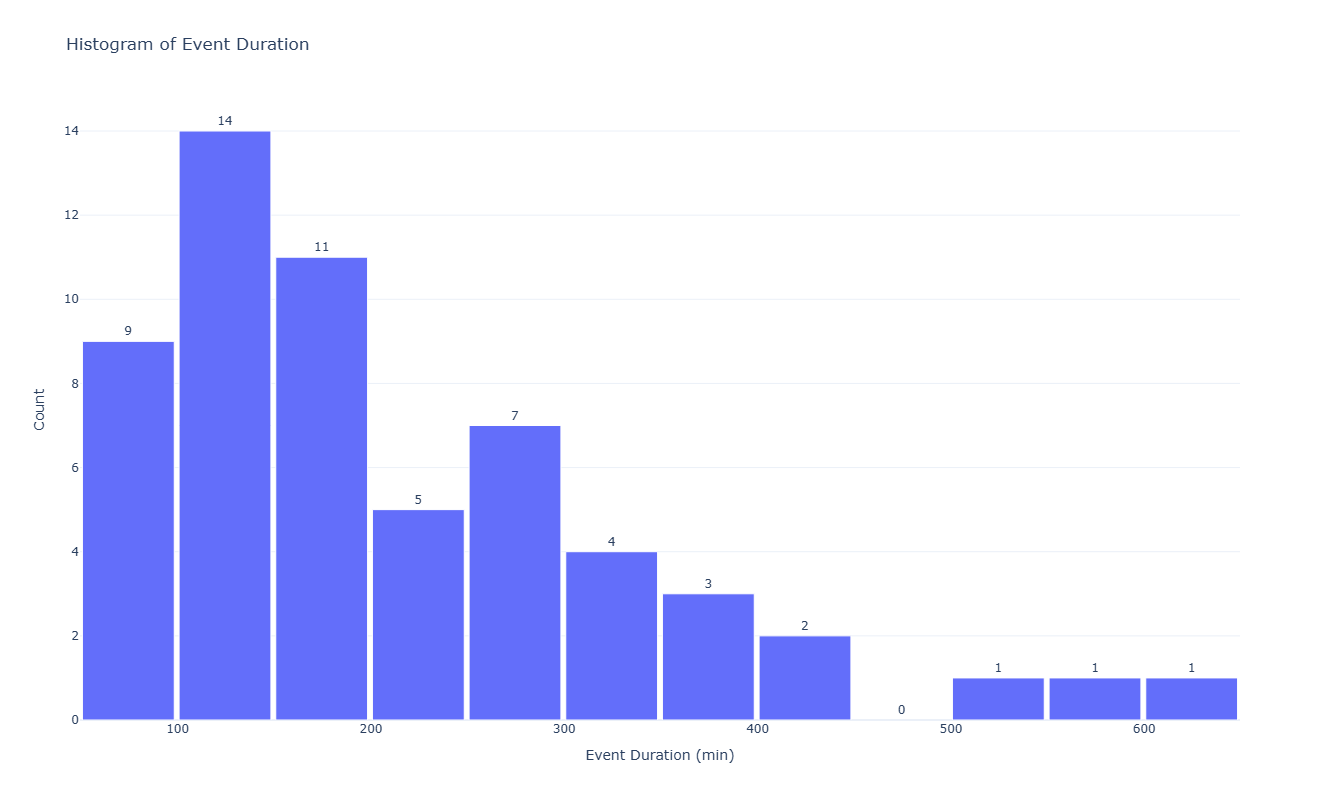

In [112]:
# --- Histogram of Event Duration with square layout and value labels ---
fig_event = px.histogram(
    merged_df,
    x='duracion_evento',
    nbins=20,
    labels={'duracion_evento': 'Event Duration (s)'},
    template='plotly_white',
    title='Histogram of Event Duration'
)
fig_event.update_traces(
    marker_line_width=1,
    marker_line_color='white',
    texttemplate='%{y}',
    textposition='outside'
)
fig_event.update_layout(
    bargap=0.05,
    xaxis_title='Event Duration (min)',
    yaxis_title='Count',
    width=800,
    height=800,
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)
fig_event.show()

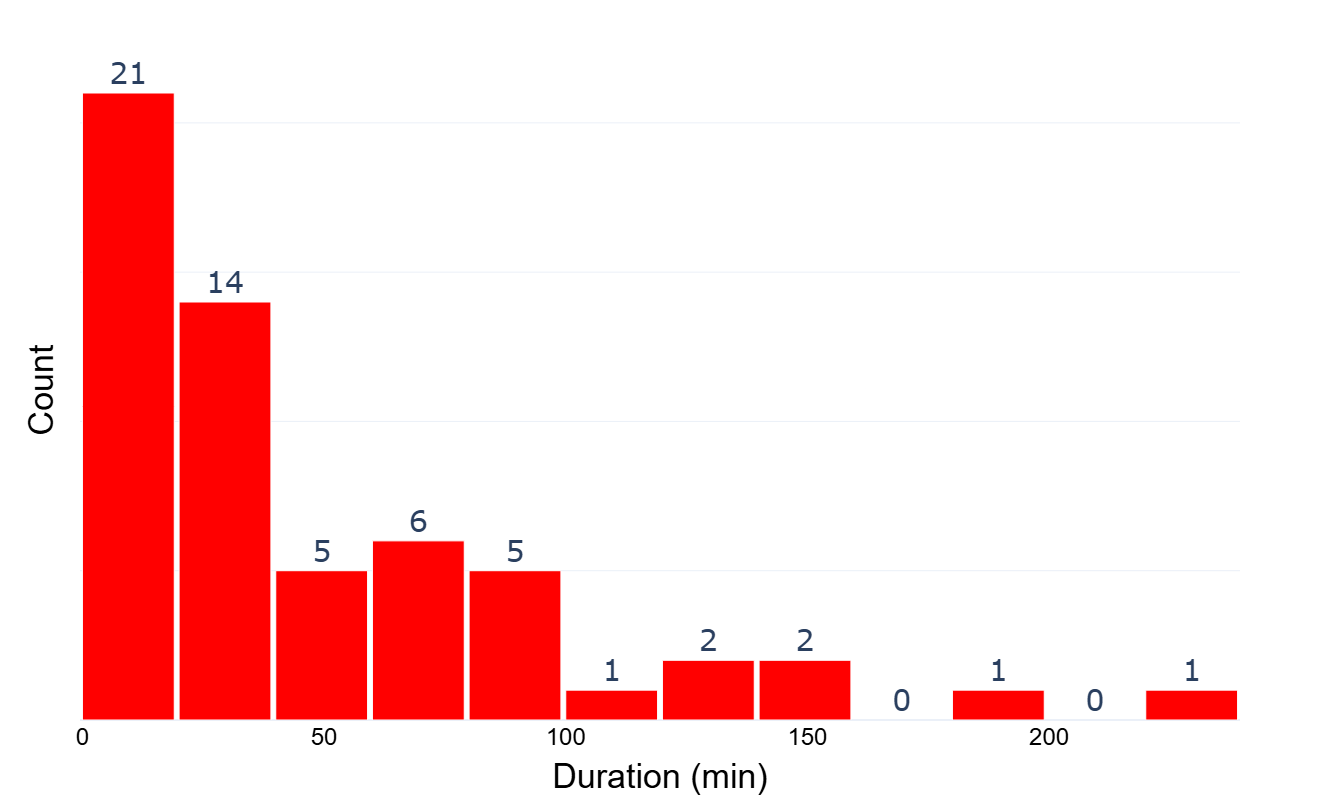

In [130]:
# Histogram with red bars
fig_global = px.histogram(
    merged_df,
    x='duracion_global',
    nbins=20,
    labels={'duracion_global': 'Duration (min)'},
    template='plotly_white',
    color_discrete_sequence=['red']  # Set bar color to red
)

fig_global.update_traces(
    marker_line_width=1,
    marker_line_color='white',
    texttemplate='%{y}',
    textposition='outside'
)

fig_global.update_layout(
    bargap=0.05,
    width=800,
    height=800,
    xaxis=dict(
        title='Duration (min)',
        title_font=dict(size=34, family='Arial', color='black'),
        tickfont=dict(size=24, family='Arial', color='black')
    ),
    yaxis=dict(
        title='Count',
        title_font=dict(size=34, family='Arial', color='black'),
        showticklabels=False   # Hide y-axis numbers
    ),
    uniformtext_minsize=30,
    uniformtext_mode='hide'
)

fig_global.show()

In [110]:
import pandas as pd

# --- Asegúrate de que merged_df ya esté cargado y tenga la columna 'global_fecha' ---
# Si no es datetime, conviértela:
merged_df['global_fecha'] = pd.to_datetime(merged_df['global_fecha'])

# 1) Conteo de cada valor en 'duracion_evento' con lista de fechas asociadas
event_counts = (
    merged_df
    .groupby('duracion_evento')
    .agg(
        count=('duracion_evento', 'size'),
        global_fechas=('global_fecha', lambda x: x.dt.strftime('%Y-%m-%d %H:%M:%S').tolist())
    )
    .reset_index()
    .sort_values('duracion_evento')
)

# 2) Conteo de cada valor en 'duracion_global' con lista de fechas asociadas
global_counts = (
    merged_df
    .groupby('duracion_global')
    .agg(
        count=('duracion_global', 'size'),
        global_fechas=('global_fecha', lambda x: x.dt.strftime('%Y-%m-%d %H:%M:%S').tolist())
    )
    .reset_index()
    .sort_values('duracion_global')
)

# Mostrar resultados por pantalla
#print("Event Duration Counts with Dates:")
#print(event_counts.to_string(index=False))

print("\nGlobal Duration Counts with Dates:")
print(global_counts.to_string(index=False))


Global Duration Counts with Dates:
 duracion_global  count                                                                                                                                                                                                                                                                                                                                                                                                                                             global_fechas
            10.0     21 [2021-06-19 02:40:00, 2021-07-27 01:20:00, 2021-08-25 01:50:00, 2021-10-01 23:50:00, 2021-10-03 09:10:00, 2021-10-04 06:10:00, 2021-10-06 14:30:00, 2021-10-23 15:00:00, 2021-11-05 21:40:00, 2021-11-16 17:10:00, 2021-11-17 00:30:00, 2021-11-18 06:30:00, 2021-12-12 16:40:00, 2022-01-03 05:40:00, 2022-01-09 15:50:00, 2022-01-26 18:10:00, 2022-01-27 13:40:00, 2022-03-02 19:10:00, 2022-03-09 22:40:00, 2022-03-11 14:00:00, 2022-04-05 15:50:00]
            20.0      7         

In [111]:
ruta = "/home/nivelrios/documentos/Mburicao Project/src/data"
os.makedirs(ruta, exist_ok=True)
archivo = os.path.join(ruta, "peaks_counts_dates.csv")
global_counts.to_csv(archivo, index=False)